In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Projects Files\Python projects\movies csv.csv")


In [5]:
df.shape

(7668, 15)

In [6]:
df.head(5)

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year
0,19000000.0,46998772.0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146.0,8.4,927000.0,1980
1,4500000.0,58853106.0,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104.0,5.8,65000.0,1980
2,18000000.0,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124.0,8.7,1200000.0,1980
3,3500000.0,83453539.0,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,88.0,7.7,221000.0,1980
4,6000000.0,39846344.0,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,98.0,7.3,108000.0,1980


In [7]:
# missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 28%
gross - 2%
name - 0%
rating - 1%
genre - 0%
released - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
company - 0%
runtime - 0%
score - 0%
votes - 0%
year - 0%


In [8]:
df=df.dropna()

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
gross - 0%
name - 0%
rating - 0%
genre - 0%
released - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
company - 0%
runtime - 0%
score - 0%
votes - 0%
year - 0%


In [10]:
df.dtypes

budget      float64
gross       float64
name         object
rating       object
genre        object
released     object
director     object
writer       object
star         object
country      object
company      object
runtime     float64
score       float64
votes       float64
year          int64
dtype: object

In [11]:
#change datatype of columns

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')
df['runtime']=df['runtime'].astype('int64')

df.head()

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year
0,19000000,46998772,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146,8.4,927000,1980
1,4500000,58853106,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104,5.8,65000,1980
2,18000000,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124,8.7,1200000,1980
3,3500000,83453539,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,88,7.7,221000,1980
4,6000000,39846344,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,98,7.3,108000,1980


In [12]:
#to get release year and correct year
#df['year correct'] = df['released'].astype(str).str[:4]

df['Year correct'] = df['released'].str.split(',').str.get(1)
df.head(3)

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
0,19000000,46998772,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146,8.4,927000,1980,1980 (United States)
1,4500000,58853106,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104,5.8,65000,1980,1980 (United States)
2,18000000,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124,8.7,1200000,1980,1980 (United States)


In [13]:
df.dtypes

budget            int64
gross             int64
name             object
rating           object
genre            object
released         object
director         object
writer           object
star             object
country          object
company          object
runtime           int64
score           float64
votes             int64
year              int64
Year correct     object
dtype: object

In [14]:
df['Year correct'] = df['Year correct'].str[1:5]
df.head(3)

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
0,19000000,46998772,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,146,8.4,927000,1980,1980
1,4500000,58853106,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,104,5.8,65000,1980,1980
2,18000000,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,124,8.7,1200000,1980,1980


In [15]:
df = df.sort_values(by=['gross'],inplace=False, ascending=False)

In [16]:
#pd.set_option('display.max_rows', None)

In [17]:
#drop duplicated
# to view the duplicated values
#df['company'] = df['company'].drop_duplicates().sort_values(ascending=False)

df.drop_duplicates()

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
5445,237000000,2847246203,Avatar,PG-13,Action,"December 18, 2009 (United States)",James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox,162,7.8,1100000,2009,2009
7445,356000000,2797501328,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,181,8.4,903000,2019,2019
3045,200000000,2201647264,Titanic,PG-13,Drama,"December 19, 1997 (United States)",James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox,194,7.8,1100000,1997,1997
6663,245000000,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm,138,7.8,876000,2015,2015
7244,321000000,2048359754,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,149,8.4,897000,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,5073,Tanner Hall,R,Drama,"January 15, 2015 (Sweden)",Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,Two Prong Lesson,96,5.8,3500,2009,2015
2434,5000000,2970,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,Trimark Pictures,97,4.5,1900,1993,1994
3681,5000000,2554,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",John Fawcett,Karen Walton,Emily Perkins,Canada,Copperheart Entertainment,108,6.8,43000,2000,2001
272,800000,2270,Parasite,R,Horror,"March 12, 1982 (United States)",Charles Band,Alan J. Adler,Robert Glaudini,United States,Embassy Pictures,85,3.9,2300,1982,1982


In [18]:
df.head(3)

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
5445,237000000,2847246203,Avatar,PG-13,Action,"December 18, 2009 (United States)",James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox,162,7.8,1100000,2009,2009
7445,356000000,2797501328,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,181,8.4,903000,2019,2019
3045,200000000,2201647264,Titanic,PG-13,Drama,"December 19, 1997 (United States)",James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox,194,7.8,1100000,1997,1997


In [19]:
#budget high correlation
#company high correlation

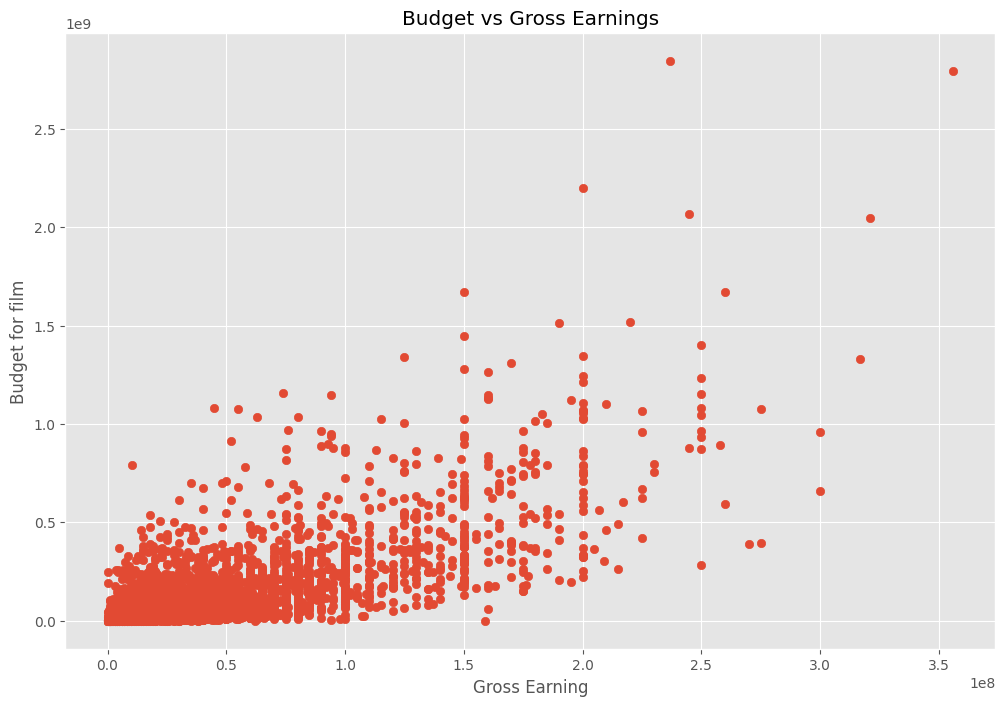

In [20]:
#scatter plot wiht bugdget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earning')
plt.ylabel('Budget for film')

plt.show()

In [21]:
df.head()

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
5445,237000000,2847246203,Avatar,PG-13,Action,"December 18, 2009 (United States)",James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox,162,7.8,1100000,2009,2009
7445,356000000,2797501328,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,181,8.4,903000,2019,2019
3045,200000000,2201647264,Titanic,PG-13,Drama,"December 19, 1997 (United States)",James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox,194,7.8,1100000,1997,1997
6663,245000000,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm,138,7.8,876000,2015,2015
7244,321000000,2048359754,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,149,8.4,897000,2018,2018


<Axes: xlabel='budget', ylabel='gross'>

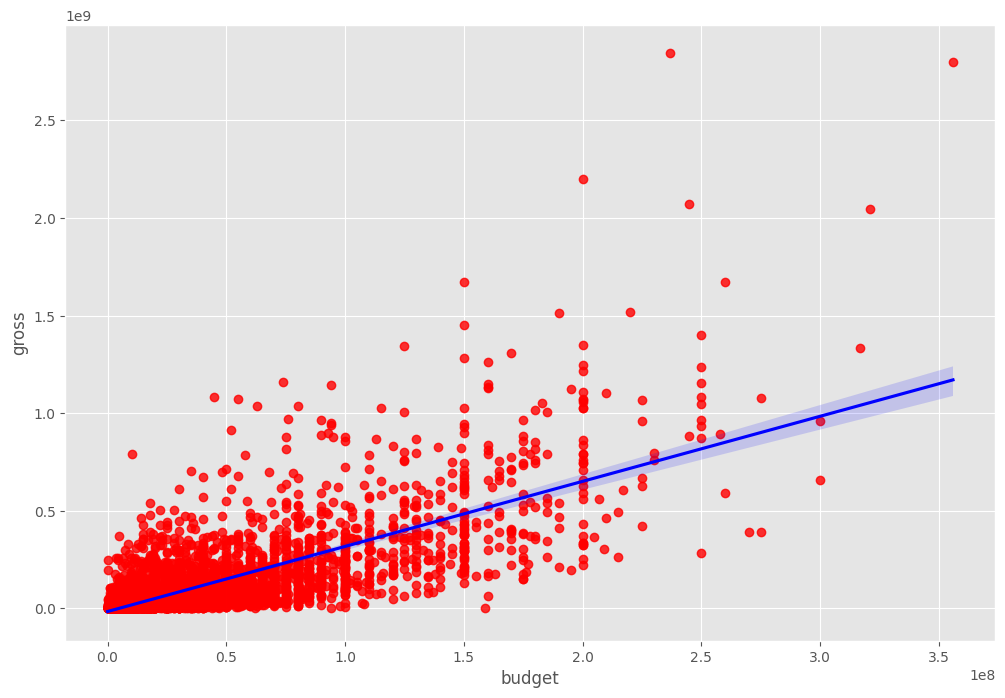

In [22]:
#Plot budget vs gross in seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [23]:
#correlation

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

           budget     gross   runtime     score     votes      year
budget   1.000000  0.740247  0.318695  0.072001  0.439675  0.327722
gross    0.740247  1.000000  0.275796  0.222556  0.614751  0.274321
runtime  0.318695  0.275796  1.000000  0.414068  0.352303  0.075077
score    0.072001  0.222556  0.414068  1.000000  0.474256  0.056386
votes    0.439675  0.614751  0.352303  0.474256  1.000000  0.206021
year     0.327722  0.274321  0.075077  0.056386  0.206021  1.000000


In [24]:
correlation_matrix = numeric_df.corr('pearson')
correlation_matrix

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


In [25]:
numeric_df.corr('kendall')


,budget,gross,runtime,score,votes,year
budget,1.000000,0.512057,0.231278,-0.006406,0.346274,0.220833
gross,0.512057,1.000000,0.176979,0.124943,0.553625,0.239539
runtime,0.231278,0.176979,1.000000,0.292254,0.205344,0.064824
score,-0.006406,0.124943,0.292254,1.000000,0.350185,0.039389
votes,0.346274,0.553625,0.205344,0.350185,1.000000,0.296512
year,0.220833,0.239539,0.064824,0.039389,0.296512,1.000000


In [26]:
numeric_df.corr('spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.692958,0.330794,-0.009971,0.493461,0.312886
gross,0.692958,1.000000,0.257400,0.183192,0.745793,0.351045
runtime,0.330794,0.257400,1.000000,0.412155,0.300621,0.095444
score,-0.009971,0.183192,0.412155,1.000000,0.495409,0.057741
votes,0.493461,0.745793,0.300621,0.495409,1.000000,0.427623
year,0.312886,0.351045,0.095444,0.057741,0.427623,1.000000


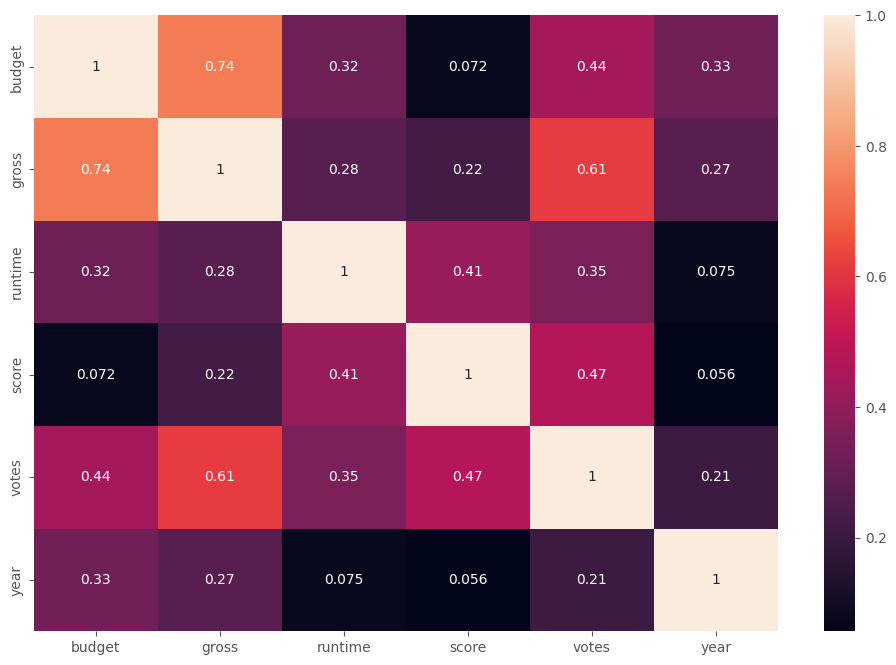

In [27]:
# high correlation between budget and gross

correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

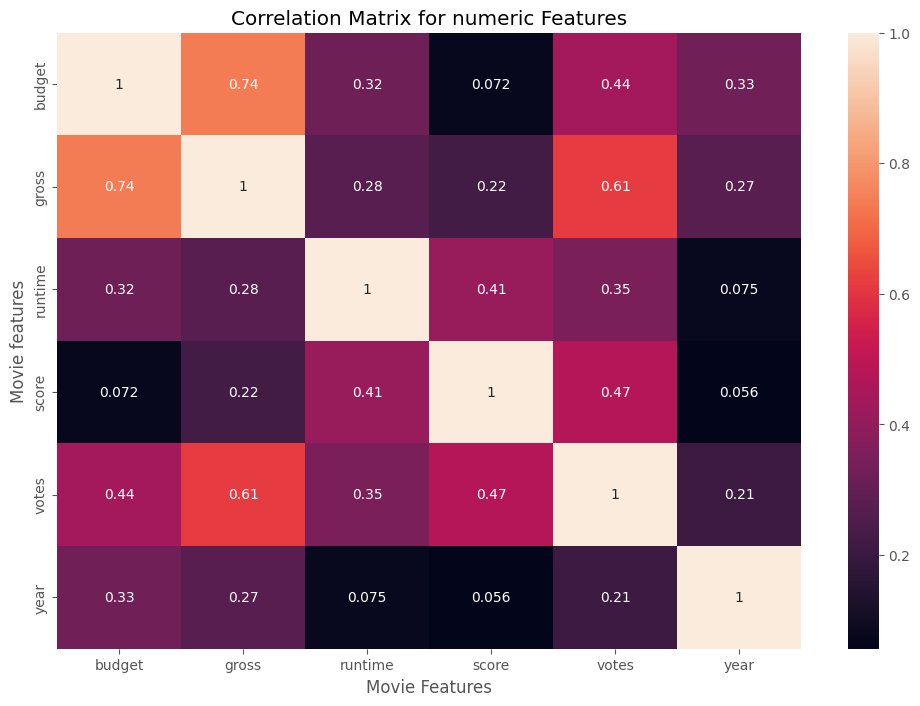

In [28]:
correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie features')

plt.show()

In [29]:
# in company

df.head(3)

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
5445,237000000,2847246203,Avatar,PG-13,Action,"December 18, 2009 (United States)",James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox,162,7.8,1100000,2009,2009
7445,356000000,2797501328,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios,181,8.4,903000,2019,2019
3045,200000000,2201647264,Titanic,PG-13,Drama,"December 19, 1997 (United States)",James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox,194,7.8,1100000,1997,1997


In [30]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(3)

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
5445,237000000,2847246203,386,5,0,527,785,1263,1534,47,1382,162,7.8,1100000,2009,29
7445,356000000,2797501328,388,5,0,137,105,513,1470,47,983,181,8.4,903000,2019,39
3045,200000000,2201647264,4909,5,6,534,785,1263,1073,47,1382,194,7.8,1100000,1997,17


In [31]:
df.head(3)

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
5445,237000000,2847246203,386,5,0,527,785,1263,1534,47,1382,162,7.8,1100000,2009,29
7445,356000000,2797501328,388,5,0,137,105,513,1470,47,983,181,8.4,903000,2019,39
3045,200000000,2201647264,4909,5,6,534,785,1263,1073,47,1382,194,7.8,1100000,1997,17


In [32]:
df.head(3)

,budget,gross,name,rating,genre,released,director,writer,star,country,company,runtime,score,votes,year,Year correct
5445,237000000,2847246203,386,5,0,527,785,1263,1534,47,1382,162,7.8,1100000,2009,29
7445,356000000,2797501328,388,5,0,137,105,513,1470,47,983,181,8.4,903000,2019,39
3045,200000000,2201647264,4909,5,6,534,785,1263,1073,47,1382,194,7.8,1100000,1997,17


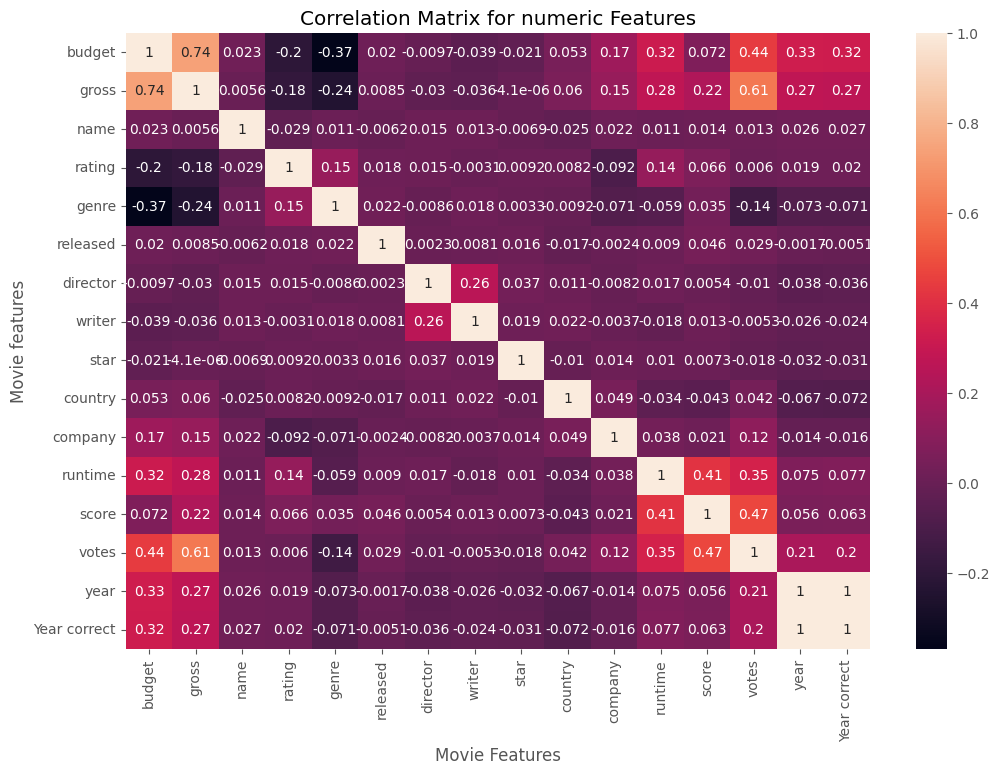

In [33]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie features')

plt.show()

In [34]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              gross           0.740247
              name            0.023392
              rating         -0.203946
              genre          -0.368523
                                ...   
Year correct  runtime         0.076666
              score           0.062648
              votes           0.204183
              year            0.996723
              Year correct    1.000000
Length: 256, dtype: float64

In [35]:
sorted_pairs = corr_pairs.sort_values

sorted_pairs

<bound method Series.sort_values of budget        budget          1.000000
              gross           0.740247
              name            0.023392
              rating         -0.203946
              genre          -0.368523
                                ...   
Year correct  runtime         0.076666
              score           0.062648
              votes           0.204183
              year            0.996723
              Year correct    1.000000
Length: 256, dtype: float64>

In [36]:
""" high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr """

' high_corr = sorted_pairs[(sorted_pairs) > 0.5]\n\nhigh_corr '

In [37]:
# votes and budget have high correlation to gross earnings

#company has low correlation